In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import sklearn.svm as svm
import pylab as pl
import seaborn as sns
import random
from matplotlib import pyplot as plt
#from ipywidgets import interact
from sklearn import svm, grid_search, datasets
from sklearn import cross_validation as cv
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split

In [2]:
# sklearn が用意しているお試し用のデータセット
print ([i for i in dir(datasets) if i.startswith("load")])

['load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_lfw_pairs', 'load_lfw_people', 'load_linnerud', 'load_mlcomp', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files']


In [3]:
# sklearn が用意している人工データセット
print ([i for i in dir(datasets) if i.startswith("make")])

['make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classification', 'make_regression', 'make_s_curve', 'make_sparse_coded_signal', 'make_sparse_spd_matrix', 'make_sparse_uncorrelated', 'make_spd_matrix', 'make_swiss_roll']


In [4]:
# そのなかで iris をロードして用いる。
iris = datasets.load_iris()

In [5]:
# iris のデータを確認する。
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
# iris のデータの説明文
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# iris のデータは dict 型で与えられている
print (iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# ドットで呼び出すこともできる。これは特徴量の名前
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# 特徴量のデータ構造を確認する
print("data: ",iris.data.shape)

('data: ', (150, 4))


In [10]:
#特徴量を確認する
iris.data 

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [11]:
#特徴量の最初の５つまで表示する
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [12]:
#特徴量の最初の１０個をpandasを用いてカッコよく表示する
pd.DataFrame(iris.data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
# 特徴量の統計量を確認する
pd.DataFrame(iris.data,columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#クラスラベル（回帰の時は被説明変数）
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [15]:
# ラベルのデータ構造を確認
print("target: ",iris.target.shape)

('target: ', (150,))


In [16]:
# ラベルのデータを確認
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# データ加工のために自前の変数に入れる
data = iris.data
target = iris.target

In [18]:
# データをシャッフルするための処理
n_samples, n_features = data.shape
p = range(n_samples)
random.seed(0)
random.shuffle(p)
data, target = data[p], target[p]

In [19]:
# シャッフル後のデータを確認
pd.DataFrame(data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,3.4,5.6,2.4
1,5.2,3.4,1.4,0.2
2,4.3,3.0,1.1,0.1
3,6.9,3.1,5.1,2.3
4,5.1,2.5,3.0,1.1
5,6.4,3.1,5.5,1.8
6,6.5,3.2,5.1,2.0
7,6.7,3.3,5.7,2.1
8,7.7,3.8,6.7,2.2
9,5.1,3.4,1.5,0.2


In [20]:
# シャッフル後のラベルを確認
target

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2])

In [21]:
# まず、SVMの簡単な使い方
clf_svc=SVC(probability=True) #モデルのインスタンス作成
clf_svc.fit(data[:-5],target[:-5]) #最後の5レコード以外を使って学習する

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
#最後の5レコードについて予測を行う。シャッフル後のラベルと比較してみましょう。
clf_svc.predict(data[-5:]) 

array([1, 0, 1, 2, 2])

In [23]:
# 同じことを一行で書くとこんな感じ
SVC(probability=True).fit(data[:-5],target[:-5]).predict(data[-5:])

array([1, 0, 1, 2, 2])

In [24]:
#予測結果のスコアを0-1で正規化した値
score_svc=clf_svc.predict_proba(data[-5:])
pd.DataFrame(score_svc,columns=iris.target_names)

,setosa,versicolor,virginica
0,0.008110,0.988349,0.003541
1,0.961744,0.017306,0.020950
2,0.008131,0.987637,0.004233
3,0.008941,0.009447,0.981612
4,0.010823,0.460580,0.528597


In [25]:
# SVMは識別境界面からの距離もスコアリングに使える
clf_svc.decision_function_shape="ovr"
pd.DataFrame(clf_svc.decision_function(data[-5:]),columns=iris.target_names)

,setosa,versicolor,virginica
0,0.331160,1.500000,1.168840
1,1.622503,1.197348,0.180149
2,0.312435,1.506563,1.181002
3,0.312501,1.116463,1.571036
4,0.357198,0.824262,1.818540


In [26]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [27]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [28]:
#予測結果の詳細の最初の５レコード
pd.DataFrame(probas,columns=iris.target_names).head(5)

,setosa,versicolor,virginica
0,0.946747,0.036481,0.016772
1,0.022788,0.252316,0.724896
2,0.053607,0.932212,0.014181
3,0.962941,0.023338,0.013721
4,0.942291,0.038066,0.019643


In [29]:
#予測結果
pred

array([0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 2, 2])

In [30]:
#正解
target_test

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 2, 2])

In [31]:
# 予測と正解の比較。
pd.DataFrame(confusion_matrix(pred, target_test))

,0,1,2
0,25,0,0
1,0,28,1
2,0,2,19


In [32]:
# cv=5 で５分割クロスバリデーションし精度を計算
score=cv.cross_val_score(classifier,data,target,cv=5,n_jobs=-1)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9667 (+/- 0.0365)


In [33]:
#データをシャッフルしてクロスバリデーションする別法
data_shuffle,target_shuffle=shuffle(iris.data,iris.target)
score = cv.cross_val_score(clf_svc,data_shuffle,target_shuffle,n_jobs=-1,cv=5)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9733 (+/- 0.0249)


In [34]:
# AUC スコアを出そうと思ったらターゲットをバイナリ（二値）にしないといけないっぽい
data, target = iris.data[iris.target != 2], iris.target[iris.target != 2]

In [35]:
# 二値になっていることを確認
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
# データのシャッフル
n_samples, n_features = data.shape
p = range(n_samples)
random.seed(0)
random.shuffle(p)
data, target = data[p], target[p]

In [37]:
# シャッフルされたことを確認
target

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

In [38]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [39]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [40]:
# ROC curve のAUCスコアを出す
fpr, tpr, thresholds = roc_curve(target_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 1.000000


In [41]:
# 予測を難しくするため、不要な特徴量（ノイズ）を加える
np.random.seed(0)
data = np.c_[data, np.random.randn(n_samples, 200 * n_features)]

In [42]:
#２分割のクロスバリデーションを行うためにデータを２分割する
half = int(n_samples / 2)
data_train, data_test = data[:half], data[half:]
target_train, target_test = target[:half], target[half:]

In [43]:
# Linear SVM で学習・予測
classifier = svm.SVC(kernel='linear', probability=True)
probas = classifier.fit(data_train, target_train).predict_proba(data_test)
pred = classifier.fit(data_train, target_train).predict(data_test)

In [44]:
# ROC curve のAUCスコアを出す
fpr, tpr, thresholds = roc_curve(target_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.808000


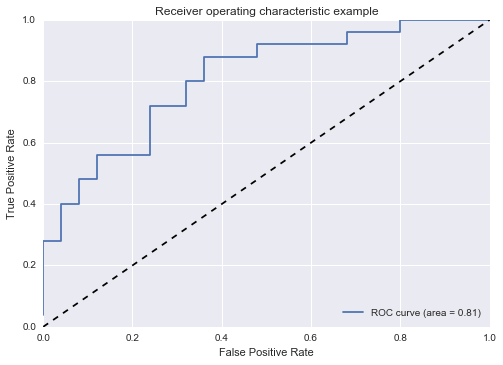

In [45]:
# ROC curve を描く
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [46]:
# PR curve のAUCスコアを出す
precision, recall, thresholds = precision_recall_curve(target_test, probas[:, 1])
area = auc(recall, precision)
print "Area Under Curve: %0.2f" % area

Area Under Curve: 0.82


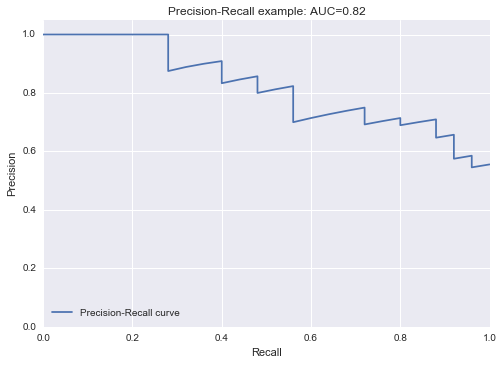

In [47]:
# PR curve を描く
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [48]:
# グリッドサーチを行うためのパラメーター
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [51]:
# データを分割するための別法
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.5, random_state=0)

In [52]:
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print '\n' + '='*50
    print score
    print '='*50

    clf = grid_search.GridSearchCV(SVC(C=1), parameters, cv=5, scoring=score, n_jobs=-1)
    clf.fit(data_train, target_train)

    print "\n+ ベストパラメータ:\n"
    print clf.best_estimator_

    print"\n+ トレーニングデータでCVした時の平均スコア:\n"
    for params, mean_score, all_scores in clf.grid_scores_:
        print "{:.3f} (+/- {:.3f}) for {}".format(mean_score, all_scores.std() / 2, params)

    print "\n+ テストデータでの識別結果:\n"
    target_true, target_pred = target_test, clf.predict(data_test)
    print classification_report(target_true, target_pred)


accuracy

+ ベストパラメータ:

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

+ トレーニングデータでCVした時の平均スコア:

0.560 (+/- 0.010) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.560 (+/- 0.010) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.660 (+/- 0.030) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.640 (+/- 0.039) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.660 (+/- 0.030) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.640 (+/- 0.039) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.660 (+/- 0.030) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.640 (+/- 0.039) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.640 (+/- 0.039) for {'kernel': 'linear', 'C': 1}
0.640 (+/- 0.039) for {'kernel': 'linear', 'C': 10}
0.640 (+/- 0.039) for {'kernel': 'linear', 'C': 100}
0.640 (+/- 0.039) for {'kernel': 'linear', 